# Análise dos nascimentos no Brasil em 2017, por tipo de parto
Em 2018, um estudo divulgado pelo jornal britânico THE LANCET sobre partos cesáreos no mundo mostrou que o Brasil era o 2º país do mundo que mais realizou o procedimento em 2015, com uma taxa de mais de 55% do procedimento desta natureza (link para o artigo: https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(18)31928-7/fulltext#%20).
Entre outras constatações, o estudo revelou que os números desse tipo de partoquase dobraram entre 2000 e 2015.
Em artigo subsequente(https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(18)32394-8/fulltext), o termo pandemia de cesáres é aplicado para referenciar o crescente número de cesáreas desnecessárias no mundo. Cita-se, também, que metade das 6.2 milhões de cesáreas desnecessárias do mundo estão no Brasil ou na China; e que normalmente o procedimento não é justificável, além de colocar em risco a saúde do bebê e da mãe.
Desta forma, é interessante conhecer as circunstâncias dos partos cesáreos a fim de buscar ferramentas para diminuir suas aplicações desnecessárias.
Este trabalho pretende, através da mineração de regras de associação no dataset do Sistema Nacional de Nascimentos (SINASC), do Governo Federal, buscar um modelo do conhecimento que possa ser analisado para encontrar tais ferramentas. Serão analisados os dado do ano mais recente disponibilizado pela Fundação Osvaldo Cruz (FIOCRUZ). [Link do dataset](https://pcdas.icict.fiocruz.br/conjunto-de-dados/sistema-de-informacao-sobre-nascidos-vivos).

## Preparação inicial dos arquivos
O conjunto de parâmetros excluídos prm_excl se refere aos dados que não foram julgados necessários à tarefa proposta. Os seguintes parâmetros ou grupos de parâmetros foram excluídos:
- códigos, como de localidades, municípios, Estados, regiões adminsitrativas de saúde, pacientes
- nomes de municípios, pois o trabalho se limita ao escopo de estados
- coordenadas geográficas do nascimento e da residência da mãe
- área de municípios e regiões
- dados de registro do nascimento (data, hora, responsável pela declaração, CRM, etc)

In [275]:
import pandas as pd

# inicializando o dataset a partir do ETL da FIOCRUZ

def db_ano(ano):  # nome do arquivo
    a = f'C:\\Users\\letan\\PycharmProjects\\KDD_partos\\ETLSINASC\\home\\' \
        f'dataiku\\dss\\exports\\data\\ETLSINASC.DNRES_{ano}.csv'
    return a

# parâmetros excluídos do estudo
prm_excl = ['"NUMERODN', 'CODINST', 'ORIGEM', 'NUMERODV', 'PREFIXODN', 'CODESTAB', 'CODMUNNASC', 'ESTCIVMAE', 'ESCMAEAGR1',
            'def_escol_mae', 'CODMUNRES', 'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'SEXO', 'RACACOR', 'IDANOMAL',
            'DTCADASTRO', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DTRECORIGA', 'CODMUNNATU', 'CODUFNATU',
            'ESCMAE2010', 'DTNASCMAE', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'nasc_MUNNOME', 'nasc_MUNNOMEX',
            'nasc_MSAUDCOD', 'nasc_RSAUDCOD', 'nasc_CSAUDCOD', 'nasc_LATITUDE', 'nasc_LONGITUDE', 'nasc_ALTITUDE',
            'nasc_AREA', 'nasc_codigo_adotado', 'res_MUNNOME', 'res_MUNNOMEX', 'res_MSAUDCOD', 'res_RSAUDCOD',
            'res_CSAUDCOD', 'res_LATITUDE', 'res_LONGITUDE', 'res_ALTITUDE', 'res_AREA', 'res_codigo_adotado',
            'nasc_CODIGO_UF', 'nasc_NOME_UF', 'res_CODIGO_UF', 'res_NOME_UF', 'codanomal_capitulo', 'codanomal_grupo',
            'codanomal_subcategoria', 'nasc_coordenadas', 'res_coordenadas', 'parto_prematuro', 'QTDFILVIVO', 'PARIDADE',
            'DIFDATA', 'SEMAGESTAC', 'SERIESCMAE', 'CONSPRENAT', 'DTNASC', 'TPMETESTIM', 'KOTELCHUCK', 'DTULTMENST', 'STDNNOVA',
            'LOCNASC', 'NATURALMAE']

titulos = open(db_ano(1900), 'r').readline().split('\t')

# criando lista dos atributos a serem utilizados
usar = list(set(titulos) - set(prm_excl))
usar.remove('def_parto_prematuro"\n')
usar.append('def_parto_prematuro')
print(f'Usando {len(usar)} parâmetros:')
print(*usar[:15], sep=' , ')
print(*usar[16:30])
print(*usar[31:45])
print(*usar[45:])

# a ideia é, se houver tempo, realizar o estudo para os anos anteriores, caso em que a estrutura será reutilizada.

ano = 2017
# divisão em pedaços para depois concatenar, em função da limitação de RAM
chunksize = 250000
chunk = pd.read_csv(db_ano(ano), sep='[\t|"]', engine='python', usecols=lambda x: x in usar, chunksize=chunksize ) 
df = pd.concat(chunk)

Usando 46 parâmetros:
TPNASCASSI , res_REGIAO , CODPAISRES , def_gravidez , RACACORMAE , QTDPARTCES , QTDGESTANT , PESO , nasc_REGIAO , res_FRONTEIRA , res_SIGLA_UF , def_sexo , TPROBSON , codanomal_categoria , ano_nasc
res_AMAZONIA TPAPRESENT def_est_civil HORANASC def_raca_cor IDADEPAI def_anomalia STDNEPIDEM CODOCUPMAE MESPRENAT ESCMAE QTDPARTNOR nasc_CAPITAL def_parto
nasc_AMAZONIA IDADEMAE dia_semana_nasc def_gestacao nasc_FRONTEIRA CODANOMAL data_nasc res_CAPITAL def_consultas QTDFILMORT STTRABPART APGAR1 def_loc_nasc nasc_SIGLA_UF
def_parto_prematuro


## Exploração dos dados

In [277]:
# descrição sumária dos dados obtidos no dataset
df.info()

# idade média das mães
id_med = df['IDADEMAE'].mean()
print(f'Idade média das mães: {id_med: .2f}')

# dia da semana com mais nascimentos
print(f"Dia da semana com mais nascimentos: {df['dia_semana_nasc'].mode()}")

#número de cesáreas, dadas cesáreas anteriores.
ces_ant = df[(df['QTDPARTCES'] > 1) & (df['def_parto'] == 'Cesáreo') ]['def_parto'].count()/df[df['QTDPARTCES'] > 1]['QTDPARTCES'].count()*100
print(f'Cesáreas, dadas cesáreas anteriores: {ces_ant:.2f}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2923535 entries, 0 to 2923534
Data columns (total 46 columns):
 #   Column               Dtype  
---  ------               -----  
 0   def_loc_nasc         object 
 1   IDADEMAE             float64
 2   def_est_civil        object 
 3   ESCMAE               int64  
 4   CODOCUPMAE           float64
 5   QTDFILMORT           float64
 6   def_gestacao         object 
 7   def_gravidez         object 
 8   def_parto            object 
 9   def_consultas        object 
 10  data_nasc            object 
 11  ano_nasc             int64  
 12  dia_semana_nasc      object 
 13  HORANASC             float64
 14  def_sexo             object 
 15  APGAR1               float64
 16  APGAR5               float64
 17  def_raca_cor         object 
 18  PESO                 float64
 19  def_anomalia         object 
 20  CODANOMAL            object 
 21  RACACORMAE           float64
 22  QTDGESTANT           float64
 23  QTDPARTNOR           float64
 24

In [278]:
# números de nascimentos por região
df.groupby(by='nasc_REGIAO')['nasc_REGIAO'].count()

nasc_REGIAO
Centro-Oeste     244096
Nordeste         818068
Norte            311509
Sudeste         1152539
Sul              397323
Name: nasc_REGIAO, dtype: int64

<AxesSubplot:ylabel='População por região 2017'>

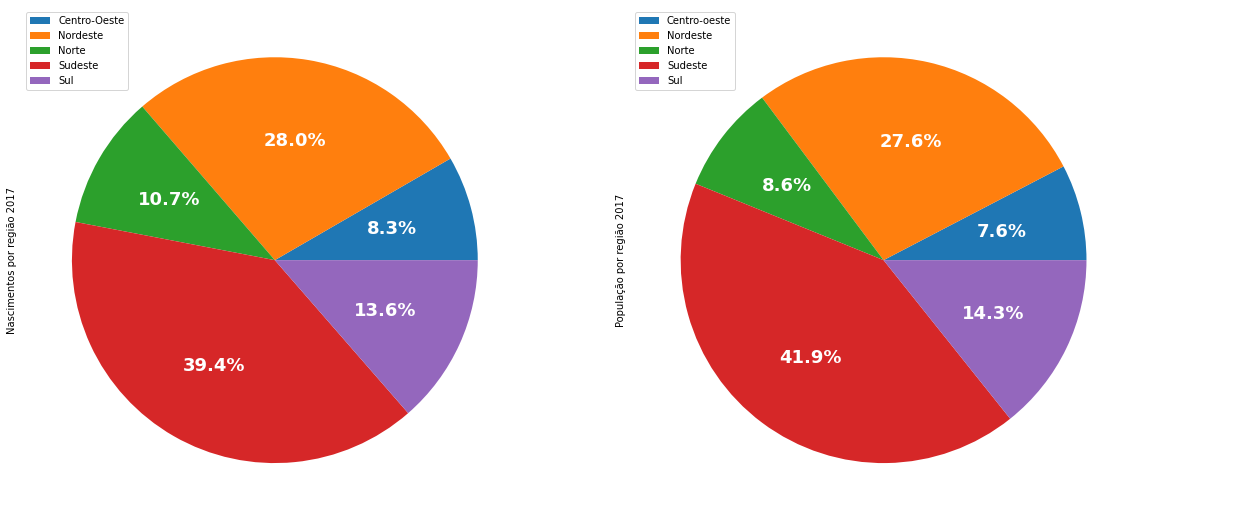

In [279]:
import matplotlib.pyplot as plt
# Plotando os nascimentos por região de nascimento ('nasc_REGIAO') para o ano considerado:


plt.figure(figsize=(20,10))
# nascimentos por região
ax1 = plt.subplot(1, 2, 1, aspect='equal')
npr = df.groupby(by='nasc_REGIAO')['nasc_REGIAO'].count().sort_index()
npr.plot.pie(ylabel=f'Nascimentos por região {ano}', ax=ax1,
         legend=True, autopct='%1.1f%%', textprops=dict(color='w', size=18, weight='bold'))

    
'''
Comparativamente, distribuição da população por região
fonte: https://pt.wikipedia.org/wiki/Demografia_do_Brasil#Distribui%C3%A7%C3%A3o_e_densidade_demogr%C3%A1ficas, em 30MAI2021
'''
ax2 = plt.subplot(1, 2, 2)
dicreg1 = {'Norte' : 17936201 , 'Nordeste' : 57254159, 'Centro-oeste' : 15875907, 'Sudeste' : 86949714, 'Sul' : 29644948}
sreg1 = pd.Series(data=dicreg1).sort_values().sort_index()
sreg1.plot.pie(ylabel=f'População por região 2017', ax=ax2,
    legend=True, autopct='%1.1f%%', textprops=dict(color='w', size=18, weight='bold'))


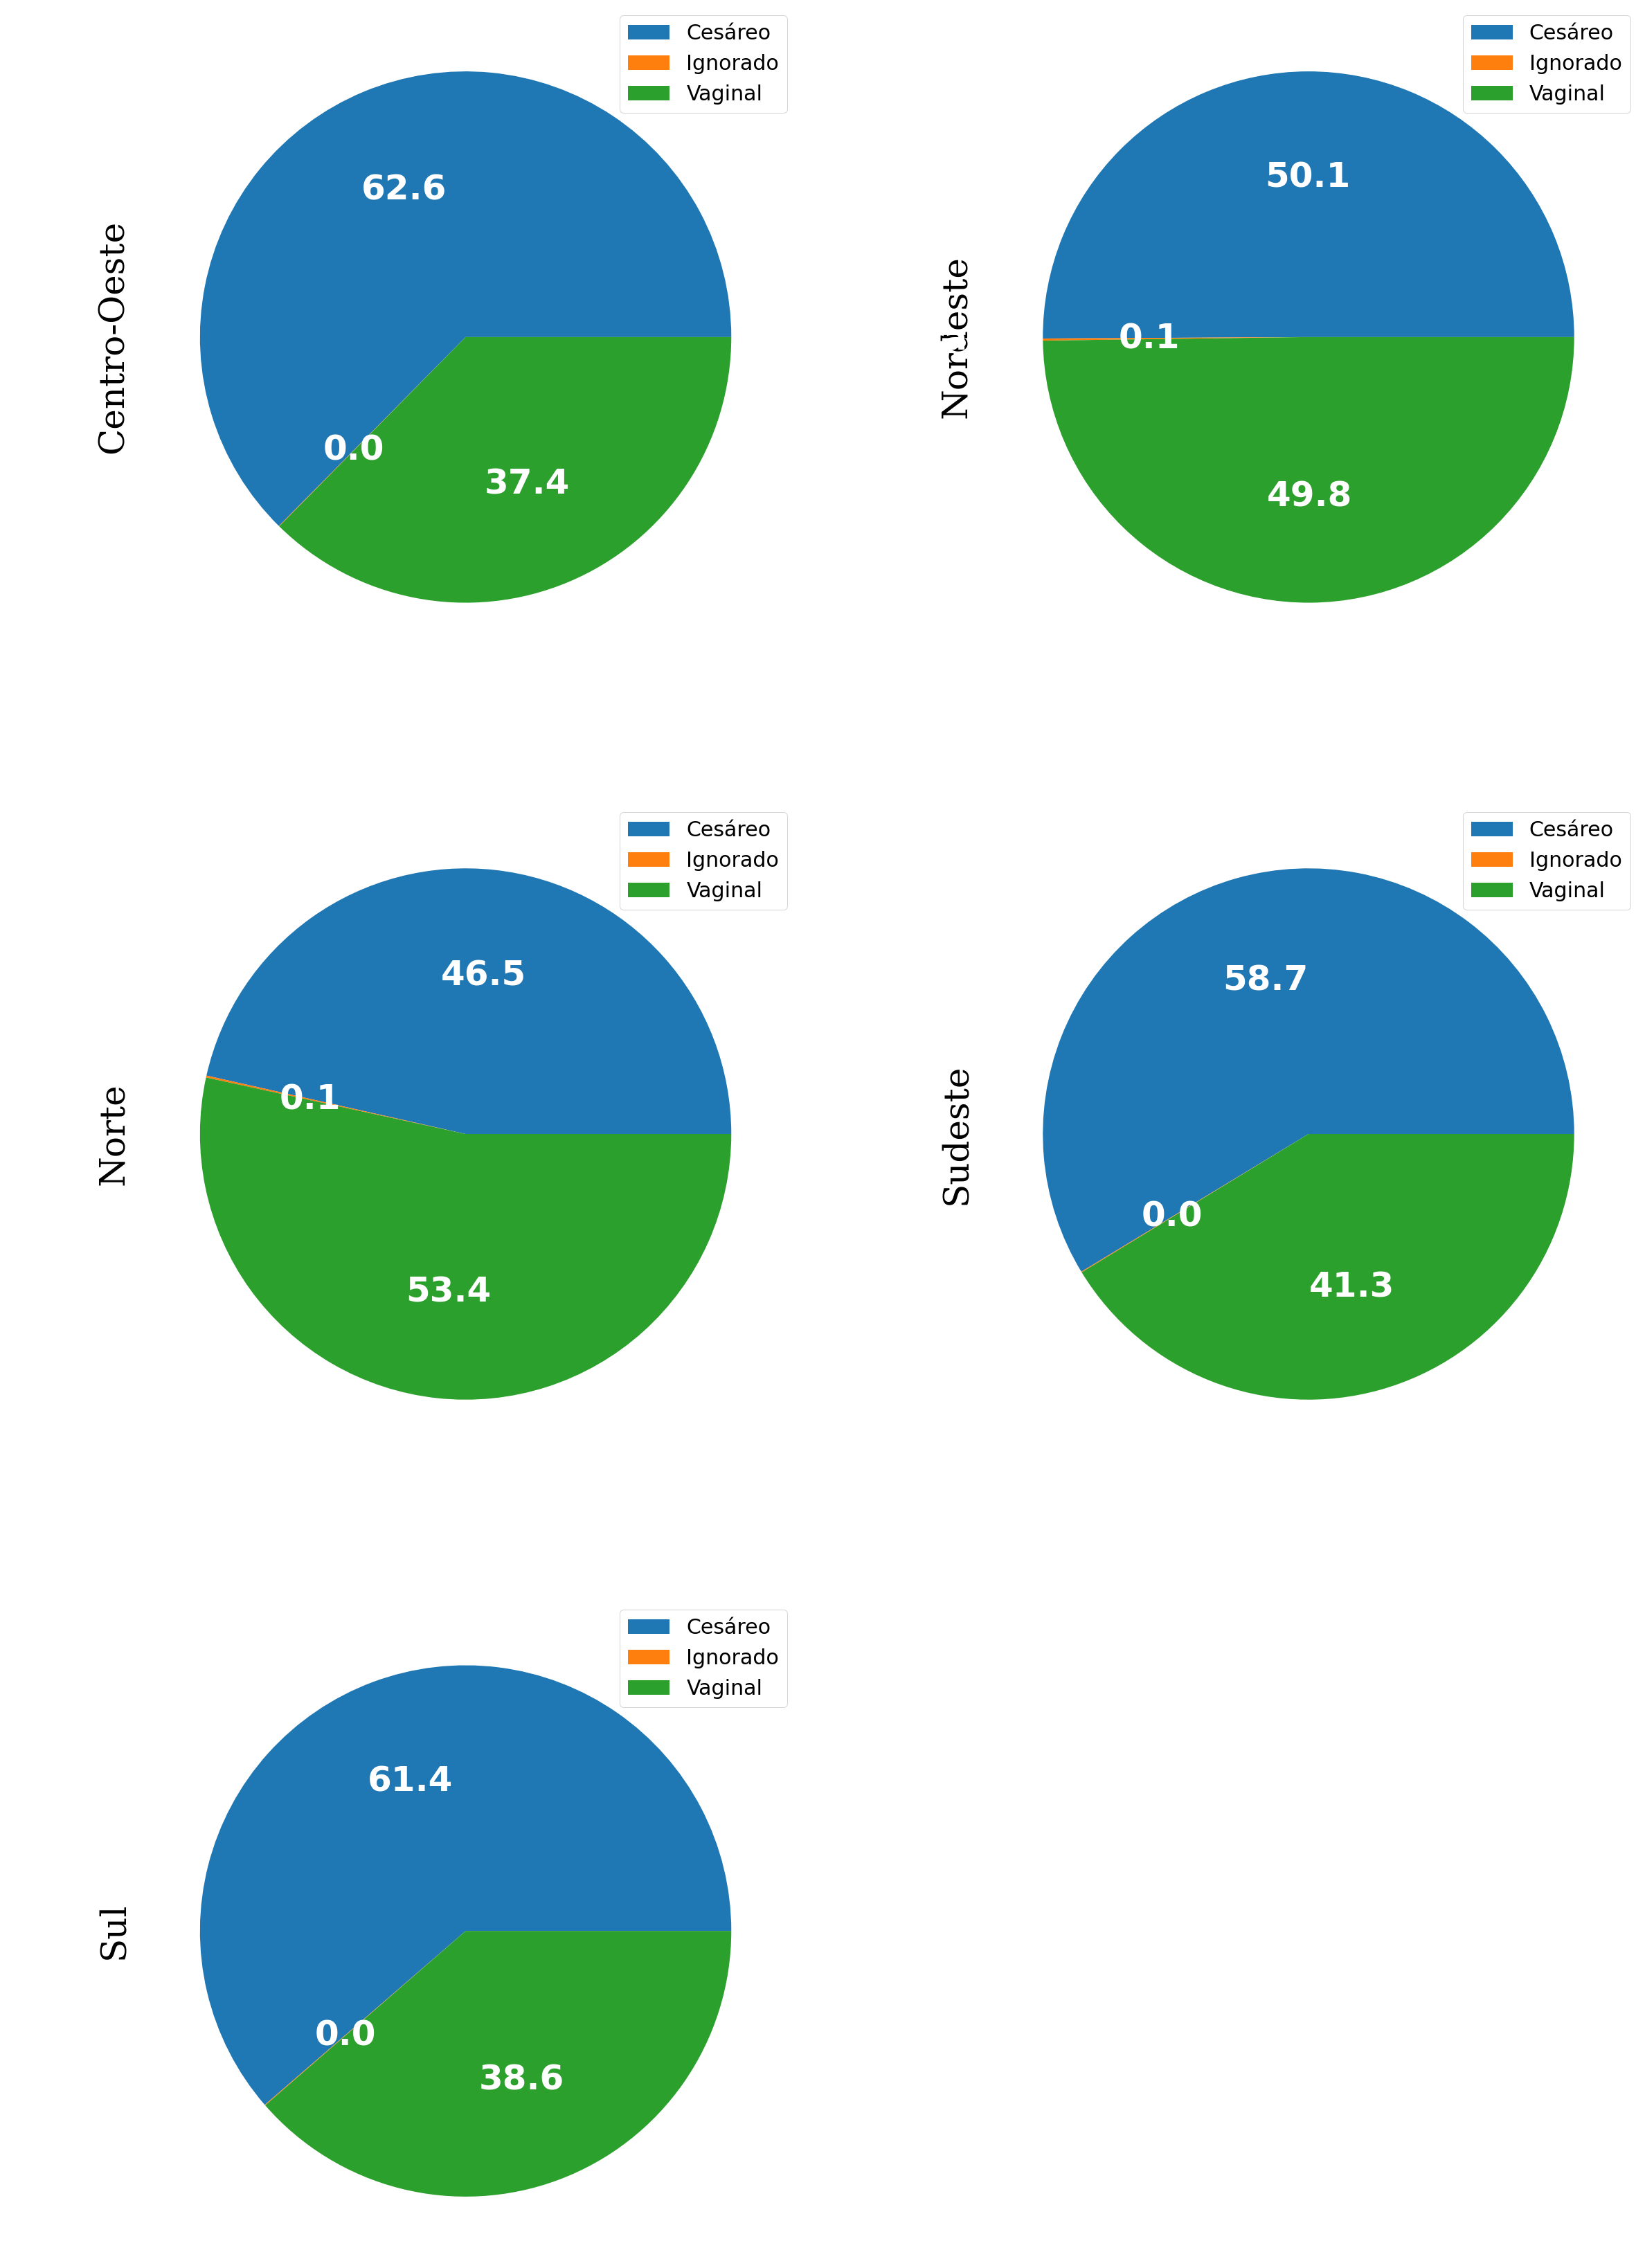

In [280]:
# número de partos cesáreo x natural por região e visualização gráfica

plt.figure(figsize=(40,60))

nprtp = df.groupby(by=['def_parto', 'nasc_REGIAO']).size().unstack()


font1 = {'family':'serif', 'size':50}
for i in range(len(nprtp.columns)):
    axi = plt.subplot(3, 2, i+1)    
    nprtp.plot.pie(y = i, ax = axi, autopct ='%1.1f', textprops = dict(color='w', size = '50', weight = 'bold'),
              legend = True)
    plt.legend(prop = {'size': 30})
    plt.ylabel(nprtp.columns[i], fontdict = font1)

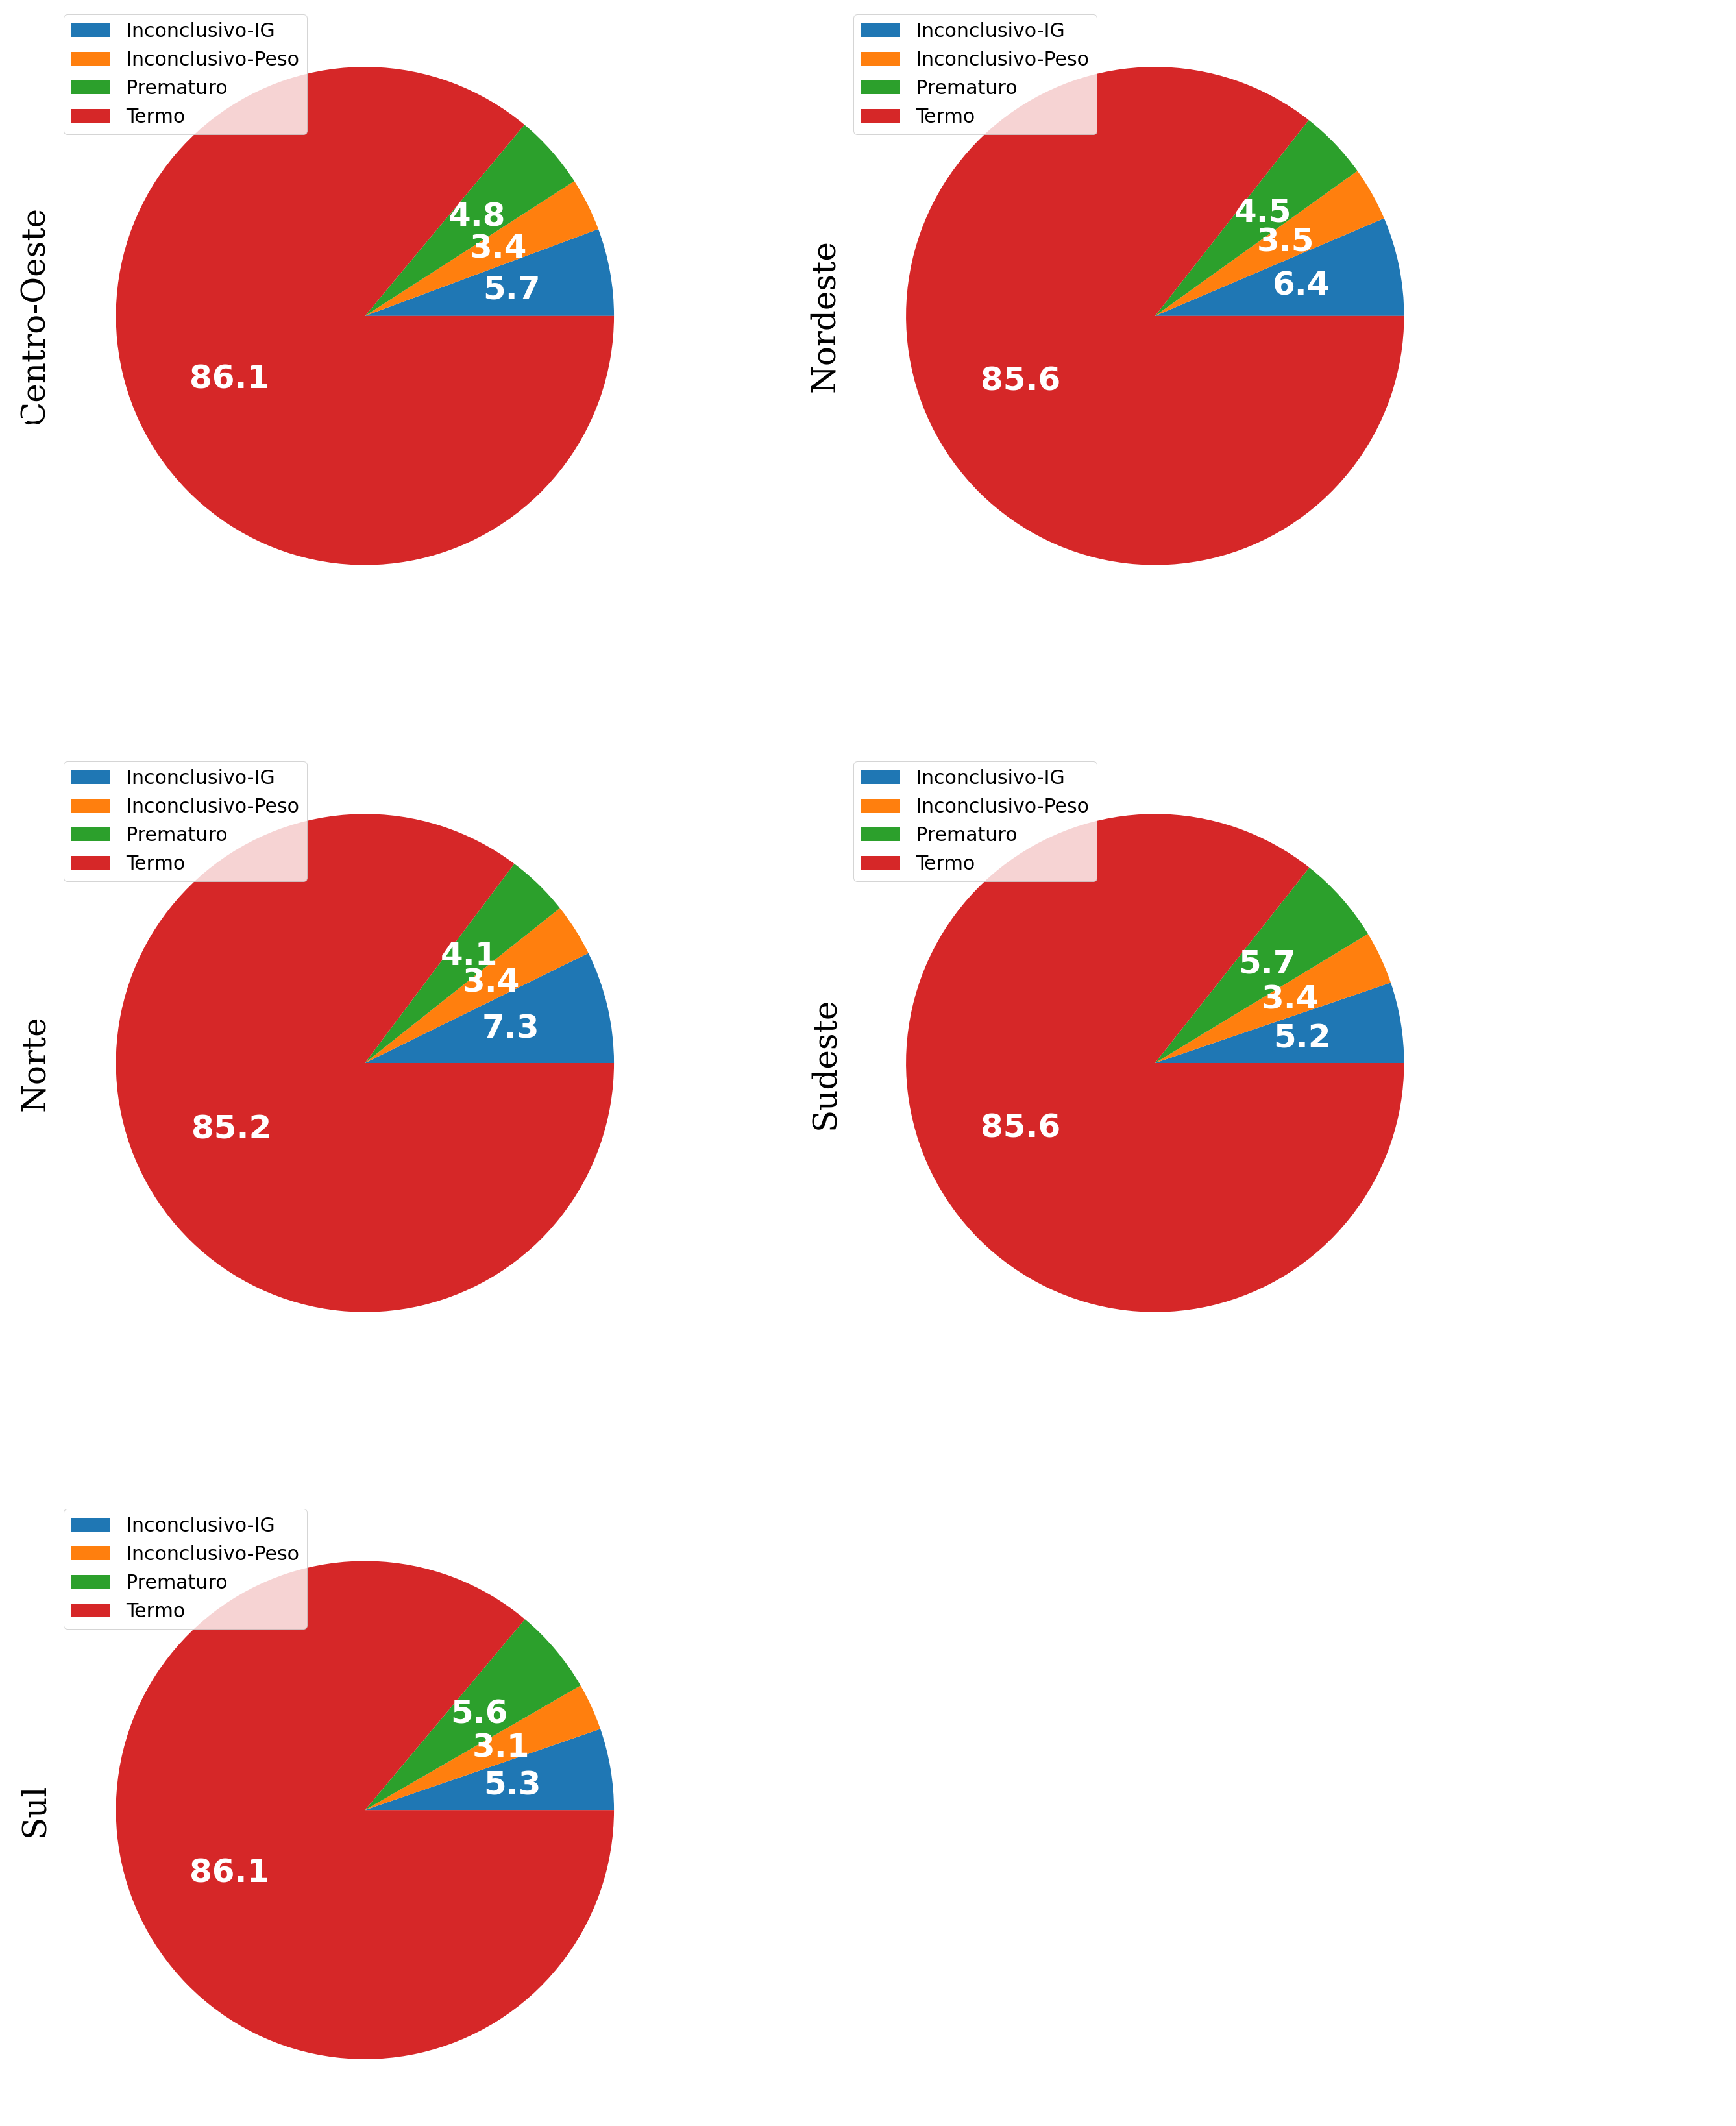

In [281]:
# partos prematuros por região

plt.figure(figsize=(40,60))

nprpp = df.groupby(by=['def_parto_prematuro', 'nasc_REGIAO']).size().unstack()

font1 = {'family':'serif', 'size':50}
for i in range(len(nprpp.columns)):
    axi = plt.subplot(3, 2, i+1)    
    nprpp.plot.pie(y = i, ax = axi, autopct ='%1.1f', textprops = dict(color='w', size = '50', weight = 'bold'),
              legend = True)
    plt.legend(prop = {'size': 30})
    plt.ylabel(nprpp.columns[i], fontdict = font1)

In [282]:
# retirando preenchimentos de idade da mãe como 99:
df = df[df['IDADEMAE'] != 99]

print(df[df['IDADEMAE'] > 70 ]['IDADEMAE'].count())

0


In [ ]:
# mãe mais velha
id_max = df['IDADEMAE'].max()
print(f'Idade máxima: {id_max}')

#mãe mais nova
id_min = df['IDADEMAE'].min()
print(f'Idade mínima: {id_min}')

print(f"Mães com menos de 16 anos:{df[df['IDADEMAE'] < 16 ]['IDADEMAE'].count()}")
print(f"Mães com mais de 45 anos:{df[df['IDADEMAE'] > 45 ]['IDADEMAE'].count()}")

### Discretização
A fim de pemitir a mineração das regras com maior confiança, dos seguintes atributos:  

#### Idade da mãe (IDADEMAE):
- número natural, tranformado em faixas de idade pelos seguintes critérios  
Idade menor que 16 anos, que representa a faixa etária que tem risco aumentado na gestação  
Entre 16 e 18 anos, consideradas adolescentes pelo ECA (Lei Federal 8069/90)  
Entre 19 e 35 anos,  
Entre 35 e 45 anos,  
Acima de 45 anos  

#### idade do pai (IDADEPAI):
- número natural, transformado para acompanhar as faixas de idades para a mãe  

#### Apgar 1 e Apgar 5
- Apgar são medições realizadas após o nascimento do bebê que indica se há indícios de asfixia no processo de parto. As faixas para ambos os teste (realizados a 1 e 5 minutos de vida, respectivamente), são as seguintes:  
0 a 2 : asfixia grave  
3 a 5 : asfixia moderada  
6 a 7 : asfixia leve transitória  
8 a 10 : não passou por asfixia  

#### Mês em que iniciou o pré-natal (MESPRENAT)
- Para acompanhar o índice de cuidado pré-natal proposto por KOTELCHUCK, as faixas serão as seguintes:  
1-2 meses de gestação  
3-4 meses de gestação  
5-6 meses de gestação  
7-9 meses ou sem acompanhamento  

####  cesáreas (QTDPARTCES) e partos naturais (QTDPARTNOR) anteriores, quantidade de gestações anteriores (QTDGESTANT), existência de filhos mortos (QTDFILMORT)
- Transformar os valores numéricos em sim ou não  

#### Peso (PESO)
- Valores em kg, transformados em faixas:  
Abaixo de 2500 g (indício de prematuridade)  
De 2500 a 3500  
Acima de 3500  

#### Tempo do nascimento (data_nasc)
- Transformar a hora em turnos:  
Manhã (06:00 às 11:59)  
Tarde (12:00 às 17:59)  
Noite (18:00 às 23:59)  
Madrugada (00:00 às 06:00)  

- Transformar a data em:  
Mês (01 a 12)  
Início do mês (dia 01 a 10)  
Meio do mês (dia 11 a 20)  
Final do mês (dia maior que 20)  

#### Código da ocupação da mãe
- Os códigos são números de 6 dígitos (2 DV) atribuídos pelo Ministério do Trabalho (ou equivalente) na [Classificação Brasileira de Ocupações](http://www.mtecbo.gov.br/cbosite/pages/informacoesGerais.jsf#6), a fim de especificar a profissão do trabalhador. Para fins da mineração, em vez da ocupação específica serão usados os grandes grupos ocupacionais da CBO (doravante GGOCBO), caracterizados pelo primeiro dígito do código.  
0:	Forças Armadas, Policiais e Bombeiros Militares  
1:	Membros superiores do poder público, dirigentes de organizações de interesse público e de empresas e gerentes  
2:	Profissionais das ciências e das artes  
3:	Técnicos de nível médio  
4:	Trabalhadores de serviços administrativos  
5:	Trabalhadores dos serviços, vendedores do comércio em lojas e mercados  
6:	Trabalhadores agropecuários, florestais, da caça e pesca  
7:	Trabalhadores da produção de bens e serviços industriais  
8:	Trabalhadores da produção de bens e serviços industriais  
9:	Trabalhadores de manutenção e reparação  
Acima de 999900: pessoas não classificadas na CBO, mas com informações epidemiológicas relevantes (v. [estudo de 2019, p 245](https://bvsms.saude.gov.br/bvs/publicacoes/saude_brasil_2019_analise_situacao.pdf) do Ministério da Saúde)


In [283]:
import numpy as np
# roda apenas uma vez
# idade da mãe



fx_mae = pd.cut(df.loc[: , ('IDADEMAE')], bins = [0, 15, 18, 35, 45, 70], labels = ['Até 15 anos', '16 a 18 anos',
                                                                                    '19 a 35 anos', '36 a 45 anos',
                                                                                    'Acima de 45 anos'])
df.loc[:, 'fx_mae'] = fx_mae


# idade do pai
fx_pai = pd.cut(df.loc[: , ('IDADEPAI')], bins = [0, 15, 18, 35, 45, 70], labels = ['Até 15 anos', '16 a 18 anos',
                                                                                    '19 a 35 anos', '36 a 45 anos',
                                                                                    'Acima de 45 anos'])
df.loc[:, 'fx_pai'] = fx_pai


# APGAR 1 e 5
apg1 = pd.to_numeric(df.loc[:, ('APGAR1')], errors = 'ignore')
fx_apgar1 = pd.cut( apg1, bins = [0, 2, 5, 8, 10], labels = ['Asfixia grave', 'Asfixia moderada', 'Asfixia leve', 'Sem asfixia'])
df.loc[:, 'fx_apgar1'] = fx_apgar1


apg5 = pd.to_numeric(df.loc[:, ('APGAR5')], errors = 'ignore')
fx_apgar5 = pd.cut(apg5, bins = [0, 2, 5, 8, 10], labels = ['Asfixia grave', 'Asfixia moderada', 'Asfixia leve', 'Sem asfixia'])
df.loc[:, 'fx_apgar5'] = fx_apgar5

prenat = pd.to_numeric(df.loc[:, ('MESPRENAT')], errors = 'ignore')
fx_prenat = pd.cut(prenat, bins = [1, 2, 4, 6, 9], labels = ['1-2 meses', '3-4 meses', '5-6 meses', 'Mais de 7 meses ou nulo'])
df.loc[:, 'fx_mes_prenat'] = fx_prenat

peso = pd.to_numeric(df.loc[:, ('PESO')], errors = 'ignore')
fx_peso = pd.cut(peso, bins = [0, 2500, 3500, 20000], labels = ['Menos de 2500g', 'Entre 2500g e 3500g', 'Mais de 3500g'])
df.loc[:, 'fx_peso'] = fx_peso



# verificando APGAR não preenchidos:
print(f'Nùmero de campos APGAR1 não preenchidos: {df.shape[0] - df["APGAR1"].count()}')
print(f'Nùmero de campos APGAR5 não preenchidos: {df.shape[0] - df["APGAR5"].count()}')

# tranformando em booleano QTDPARTCES QTDPARTNOR QTDGESTANT QTDFILMORT

df['Cesárea Anterior'] = np.where(df['QTDPARTCES'] > 0.0, 'Sim', 'Não')
df['Parto Normal Anterior'] = np.where(df['QTDPARTNOR'] > 0.0, 'Sim', 'Não')
df['Gestação Anterior'] = np.where(df['QTDGESTANT'] > 0.0, 'Sim', 'Não')
df['Filho Morto Anterior'] = np.where(df['QTDFILMORT'] > 0.0, 'Sim', 'Não')

# inserindo o mês de nascimento
df['mes_nasc'] = df['data_nasc']
df = df.replace({'mes_nasc' : {r'T00:00:00.000Z$' : ''}})
df = df.replace({'mes_nasc' : {r'^\d{4}-' : '', r'-\d{2}$' : ''}}, regex = True)

# inserindo o turno do nascimento
hora = pd.to_numeric(df.loc[:, ('HORANASC')], errors = 'ignore')
turno = pd.cut(hora, bins = [0, 600, 1200, 1800, 2400], labels = ['Madrugada', 'Manhã', 'Tarde', 'Noite'])
df.loc[:, 'turno_nasc'] = turno


# estratificando a ocupação da mãe
ocup = pd.to_numeric(df.loc[:, ('CODOCUPMAE')], errors = 'ignore')
GGOCBO = pd.cut(ocup, bins = [0, 99999, 199999, 299999, 399999, 499999, 599999, 699999, 799999, 899999, 998000, 999999],
                 labels = ['0' , '1', '2', '3', '4', '5', '6', '7', '8', '9', 'Outros'])
df.loc[:, 'GGOCBO'] = GGOCBO


# removendo as colunas originais
df = df.drop(columns = ['IDADEMAE', 'IDADEPAI', 'APGAR1', 'APGAR5','MESPRENAT', 'PESO',
                        'QTDPARTCES', 'QTDPARTNOR', 'QTDGESTANT', 'QTDFILMORT',
                        'data_nasc', 'HORANASC', 'CODOCUPMAE'])

Nùmero de campos APGAR1 não preenchidos: 60623
Nùmero de campos APGAR5 não preenchidos: 60578


### Acerto de atributos
- Alguns atributos estão preenchidos no formato de código, conforme o dicionário de dados, e o código será passado para texto:

**STDNEPIDEM**: 0 ou 1 trocado por Não ou Sim  
**STCESPARTO**: 'Cesárea ocorreu antes do trabalho de parto iniciar? Valores: 1–Sim; 2– Não; 3– Não se aplica; 9– Ignorado.',  trocado por Sim, Não, Não Aplicável ou Ignorado  
**TPNASCASSI**: 'Nascimento foi assistido por? Valores: 1– Médico; 2–Enfermeira/obstetriz; 3– Parteira; 4– Outros; 9– Ignorado.', trocado por Médico, Enfermeira/Obstetriz, Parteira, Outros ou Ignorado  
**STTRABPART**: 'Trabalho de parto induzido? Valores: 1– Sim; 2– Não; 3– Não se aplica; 9– Ignorado.', trocado por Sim, Não, Não Aplicável ou Ignorado  
**RACACORMAE**: 'Raça/Cor da mãe:1:Branca2:Preta3:Amarela4: Parda5: Indígena', trocado por Branca, Preta, Amarela, Parda, Indígena  
**TPAPRESENT**: 'Tipo de apresentação do RN. Valores: 1– Cefálico; 2– Pélvica ou podálica; 3– Transversa; 9– Ignorado.', trocado por Cefálico, Pélvica ou Podálica, Transversa, Ignorado  
**ESCMAE**: 'Escolaridade, anos de estudo concluídos:1: Nenhuma2: 1 a 3 anos3: 4 a 7 anos4: 8 a 11 anos5: 12 e mais9: Ignorado', trocado por Nenhuma, 1 a 3 anos, 4 a 7 anos, 8 a 11 anos, 12 e mais ou Ignorado


- Alteração da escrita de atributos para dar uniformidade:

**nasc_CAPITAL**: 'Indica (S/N) se o município de nascimento é capital de UF'. Trocado por Sim e Não  
**res_CAPITAL**: 'Indica (S/N) se o município de residência é capital de UF'. Trocado por Sim e não  
**res_AMAZONIA**: 'Indica (S/N) s  e o município de residência faz parte da Amazônia Legal (conforme IBGE)'. Trocado por Sim e Não
**nasc_AMAZONIA**:'Indica (S/N) se o município de nascimento faz parte da Amazônia Legal (conforme IBGE)'. Trocado por Sim e Não  
**nasc_FRONTEIRA**: 'Indica (S/N) se o município de nascimento faz parte da faixa de fronteira (conforme IBGE)'. Trocado por Sim e Não  
**res_FRONTEIRA**: 'Indica (S/N) se o município de residência faz parte da faixa de fronteira (conforme IBGE)'. Trocado por Sim e Não  

- Os seguintes atributos foram mantidos em códigos e serão avaliados caso necessário:

**NATURALMAE**: 'Se a mãe for estrangeira, constará o código do país de nascimento.'  
**CODPAISRES**: 'Código do país de residência'  
**codanomal_categoria**: 'Categoria CID-10 da malformação congênita ou anomalia cromossômica'  
             
       

In [284]:
df = df.replace({
    'STDNEPIDEM': {0.0 : 'Não', 1.0 : 'Sim' },
    'STCESPARTO': {1.0 : 'Sim', 2.0 : 'Não', 3.0 : 'Não Aplicável', 4.0 : 'Ignorado'},
    'TPNASCASSI': {1.0 : 'Médico', 2.0 : 'Enfermeira/Obstetriz', 3.0 : 'Parteira', 4.0 : 'Outros', 9.0 : 'Ignorado'},
    'STTRABPART': {1.0 : 'Sim', 2.0 : 'Não', 3.0 : 'Não Aplicável', 9.0 : 'Ignorado'},
    'RACACORMAE': {1.0 : 'Branca', 2.0 : 'Preta', 3.0 : 'Amarela', 4.0 : 'Parda', 5.0 : 'Indígena'},
    'TPAPRESENT': {1.0 : 'Cefálico', 2.0 : 'Pélvica ou Podálica', 3.0 : 'Transversa', 9.0 : 'Ignorado'},
    'ESCMAE' : {1 : 'Nenhuma', 2 : '1 a 3 anos', 3: '4 a 7 anos', 4: '8 a 11 anos', 5: '12 e mais', 9: 'Ignorado'},
    'nasc_CAPITAL': {'N' : 'Não', 'S' : 'Sim'},
    'res_CAPITAL': {'N' : 'Não', 'S' : 'Sim'},
    'res_AMAZONIA': {'N' : 'Não', 'S' : 'Sim'},
    'nasc_AMAZONIA': {'N' : 'Não', 'S' : 'Sim'},
    'nasc_FRONTEIRA': {'N' : 'Não', 'S' : 'Sim'},
    'res_FRONTEIRA': {'N' : 'Não', 'S' : 'Sim'}    
})

In [285]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2923510 entries, 0 to 2923534
Data columns (total 46 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   def_loc_nasc           object  
 1   def_est_civil          object  
 2   ESCMAE                 object  
 3   def_gestacao           object  
 4   def_gravidez           object  
 5   def_parto              object  
 6   def_consultas          object  
 7   ano_nasc               int64   
 8   dia_semana_nasc        object  
 9   def_sexo               object  
 10  def_raca_cor           object  
 11  def_anomalia           object  
 12  CODANOMAL              object  
 13  RACACORMAE             object  
 14  TPAPRESENT             object  
 15  STTRABPART             object  
 16  STCESPARTO             object  
 17  TPNASCASSI             object  
 18  STDNEPIDEM             object  
 19  CODPAISRES             float64 
 20  TPROBSON               int64   
 21  nasc_AMAZONIA          object  

In [286]:
df.to_csv(path_or_buf=f'KDD{ano}.csv')